# Exploratory Data Analysis: Netflix

-- Sneha Bajaj

<p align="center">
  <img src="https://i.postimg.cc/VLHbW5VZ/title-image.jpg">
</p>

## Problem Statement

The objective of this project is to recommend measures for Netflix to grow its business across different countries. We will analyse the given dataset to gather business insights on different attributes of netflix content: type of shows, ratings, duration, release year etc.

## Data Download & Basic Observations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
df = pd.read_csv('netflix_dataset.csv',
                 parse_dates= ['date_added'])

In [ ]:
df.shape

(8807, 12)

The data consists of 8807 rows and 12 columns

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

These are names of all the columns present in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


By defaut, the data has 1 int64 column (release_year), 1 datetime column (release_year) and the rest are of object data type

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


These are the first 5 rows of the dataframe

## Missing Values Check

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The dataframe has 2634 missing values in director, 825 in cast, 831 in country, 10 in date_added, 4 in rating and 3 in duration

In [ ]:
df.dropna(subset=['rating','duration','date_added'], inplace=True)
df.reset_index()
df.shape

(8790, 12)

The dataset has 8790 rows after dropping the missing values in columns rating, duration and date_added

## Non-Graphical Analysis

In [ ]:
df.nunique()

show_id         8790
type               2
title           8790
director        4526
cast            7678
country          748
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

These are the number of unique values for all the 12 features present in the dataset

In [ ]:
#Type of Show

df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

There are 2 types of shows in the dataset: Movies and TV Shows

In [ ]:
df.groupby(['type','rating'])['show_id'].count()

type     rating  
Movie    G             41
         NC-17          3
         NR            75
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             4
         R              2
         TV-14        730
         TV-G          94
         TV-MA       1143
         TV-PG        321
         TV-Y         175
         TV-Y7        194
         TV-Y7-FV       1
Name: show_id, dtype: int64

`Ratings` and `Type` are categorical columns.

The US TV guidelines have the following rating categories:
* TV-Y: All Children
* TV-Y7: Children above 7 yrs of age
* TV-G: General Audience
* TV-PG: Parental guidance suggested
* TV-14: Parents strongly cautioned (14+ years)
* TV-MA: Mature audiences only
* TV-Y7-FV: Subset of TV-Y7 with fantasy violence

Standard movie ratings in the USA are as follows:
* G: General Audiences
* PG: Parental guidance suggested
* PG-13: Parents strongly cautioned (13+ years)
* R: Restricted (17+ years)
* NC-17: Clearly Adult

Changes to be made:
* UR (unrated) is same as NR (not rated)

In [ ]:
#Changing 'UR' to 'NR' in Ratings

df.loc[df['rating']=='UR','rating'] = 'NR'

In [ ]:
# Converting 'Rating' and 'Type' to categorical columns

df[['rating','type']] = df[['rating','type']].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   category      
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          7965 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   category      
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 773.3+ KB


After making the changes, we have:
* 1 datetime column
* 1 int
* 2 category columns

In [ ]:
df.loc[df['type']=='Movie','duration'].value_counts()

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
df.loc[df['type']=='TV Show','duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

Since movie and TV shows both have different format for duration, we can split duration into 2 columns - `movie_mins` & `tv_seasons`

In [ ]:
#Adding separate column for duration of movies

df['movie_mins']=np.where(df['type']=='Movie', df['duration'].str[:-4], None)
df['movie_mins'] = df['movie_mins'].astype('float')

In [ ]:
#Adding separate column for duration of TV Shows

df['tv_seasons']=np.where(df['type']=='TV Show', df['duration'].str[:-7]
                          .apply(lambda x: x.strip()), None)
df['tv_seasons'] = df['tv_seasons'].astype('float')

In [ ]:
# Extract year from date_added column

df['year_added'] = df['date_added'].dt.year

In [ ]:
# Extract month from date_added column

df['month_added'] = df['date_added'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   category      
 2   title         8790 non-null   object        
 3   director      6169 non-null   object        
 4   cast          7965 non-null   object        
 5   country       7961 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   category      
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  movie_mins    6126 non-null   float64       
 13  tv_seasons    2664 non-null   float64       
 14  year_added    8790 non-null   int64         
 15  month_added   8790 non-null   int64   

After pre-processing, we have:
* 3 int columns (year_added, month_added and release_year)
* 2 category columns (type and rating)
* 1 datetime column (date_added)

## Outlier Check

In [ ]:
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
sns.set_style('darkgrid')

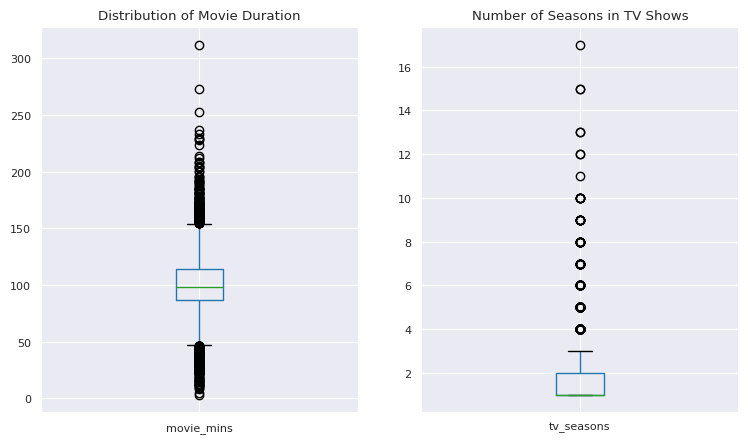

In [ ]:
#Outlier check for Duration of Movie/TV Show

fig, ax = plt.subplots(1,2)

df.boxplot(column='movie_mins', ax=ax[0])
ax[0].set_title('Distribution of Movie Duration')

df.boxplot(column='tv_seasons', ax=ax[1])
ax[1].set_title('Number of Seasons in TV Shows')

plt.show()

* 50 mins - 150 mins is the range for movie duration excluding potential outliers (values lying outside the whiskers)
* 1-3 seasons is the range for TV shows excluding potential outliers

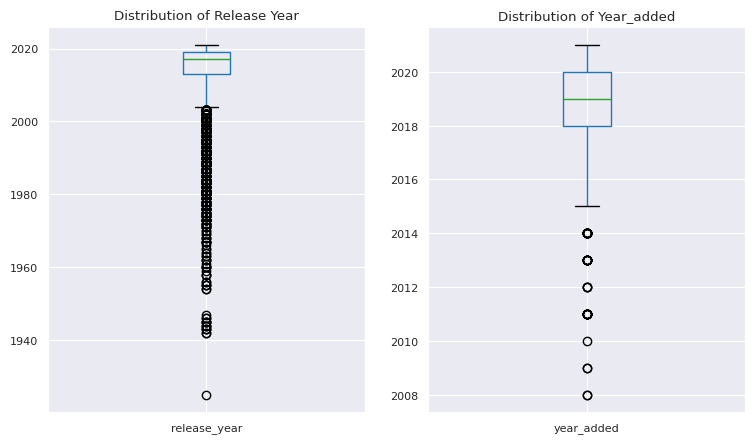

In [ ]:
#Outlier check for year of release and addition

fig, ax = plt.subplots(1,2)

df.boxplot(column='release_year', ax=ax[0])
ax[0].set_title('Distribution of Release Year')

df.boxplot(column='year_added', ax=ax[1])
ax[1].set_title('Distribution of Year_added')

plt.show()

* The release year for shows is concentrated in the range 2000-2021
* The year of adding shows is concentrated in the range 2015-2021

## Visual Analysis: Univariate

### Type of Show

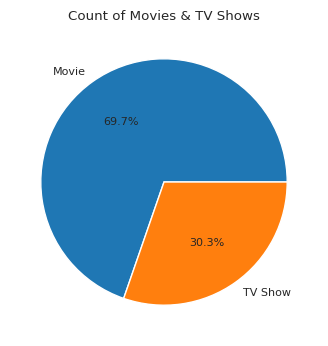

In [ ]:
show_type = df['type'].value_counts().reset_index()
show_type.columns = ['type', 'count']

plt.figure(figsize=(4,4))
plt.pie(show_type['count'], labels=show_type['type'], autopct='%1.1f%%')
plt.title('Count of Movies & TV Shows')

plt.show()

* ~70% shows on Netflix are movies and only 30% are TV shows

### Release Year

In [ ]:
release_year_count = pd.pivot_table(df, values='show_id', index='release_year',
                                    columns='type', aggfunc='count',
                                    dropna=True).reset_index()
release_year_count

type,release_year,Movie,TV Show
0,1925,0,1
1,1942,2,0
2,1943,3,0
3,1944,3,0
4,1945,3,1
...,...,...,...
69,2017,765,265
70,2018,767,379
71,2019,633,397
72,2020,517,436


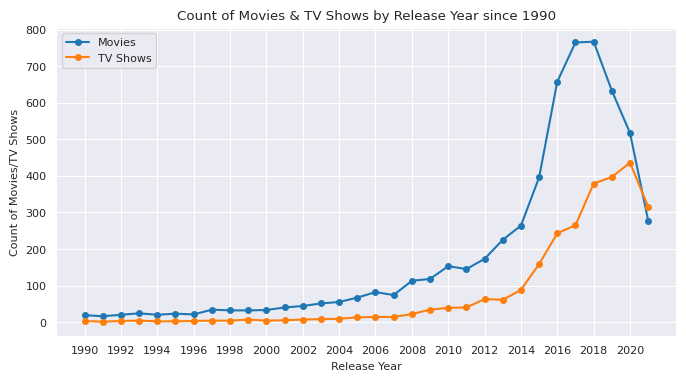

In [ ]:
# Count of movies/TV Shows by release year

plt.figure(figsize=(8,4))
plt.plot(release_year_count.loc[release_year_count['release_year']>=1990,
                                'release_year'],
         release_year_count.loc[release_year_count['release_year']>=1990,
                                'Movie'],
         marker='o', ms=4)
plt.plot(release_year_count.loc[release_year_count['release_year']>=1990,
                                'release_year'],
         release_year_count.loc[release_year_count['release_year']>=1990,
                                'TV Show'],
         marker='o', ms=4)

plt.xlabel('Release Year')
plt.ylabel('Count of Movies/TV Shows')

plt.title('Count of Movies & TV Shows by Release Year since 1990')
plt.legend(['Movies','TV Shows'])
plt.xticks(np.arange(1990,2021,2), fontsize=8)

plt.show();

* 2018 marks the highest number of movie and TV show releases
* The yearly number of releases has surged drastically from 2015.
* The period of 2005-2015 shows a gradual increase in the number of releases per year

### Ratings

In [ ]:
movie_df = df.loc[df['type']=='Movie']
tv_df = df.loc[df['type']=='TV Show']

In [ ]:
movie_rating = movie_df.groupby('rating')['show_id'].count().sort_values()
tv_rating = tv_df.groupby('rating')['show_id'].count().sort_values()

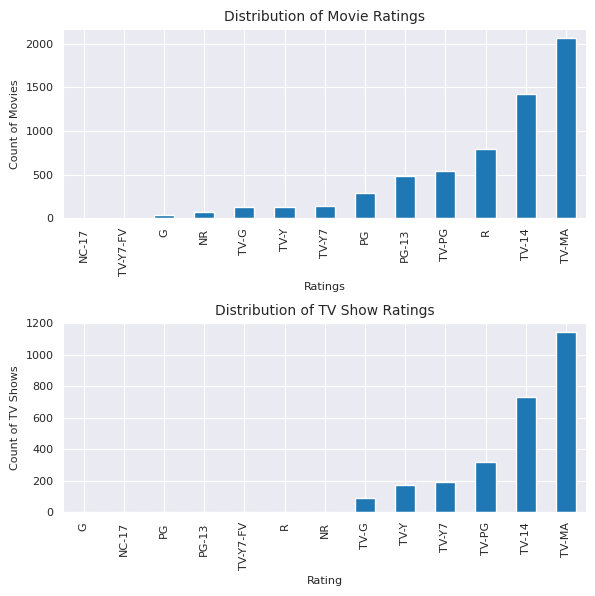

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(6,6))

movie_rating.plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of Movie Ratings', fontsize=10)
ax[0].set_xlabel('Ratings', fontsize=8)
ax[0].set_ylabel('Count of Movies', fontsize=8)

tv_rating.plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribution of TV Show Ratings', fontsize=10)
ax[1].set_xlabel('Rating', fontsize=8)
ax[1].set_ylabel('Count of TV Shows', fontsize=8)

plt.tight_layout()
plt.show()

* Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

### Duration

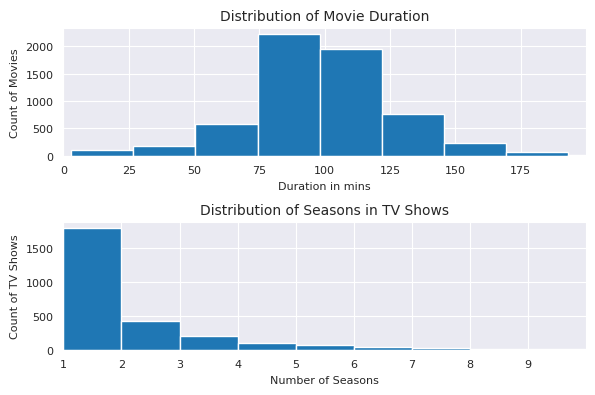

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(6,4))

ax[0].hist(movie_df.movie_mins, bins=13)
ax[0].set_title('Distribution of Movie Duration', fontsize=10)
ax[0].set_xlim(0,200)
ax[0].set_xticks(np.arange(0,200,25))
ax[0].set_xlabel('Duration in mins', fontsize=8)
ax[0].set_ylabel('Count of Movies', fontsize=8)

ax[1].hist(tv_df.tv_seasons, bins=16)
ax[1].set_title('Distribution of Seasons in TV Shows', fontsize=10)
ax[1].set_xlim(1,10)
ax[1].set_xticks(np.arange(1,10,1))
ax[1].set_xlabel('Number of Seasons', fontsize=8)
ax[1].set_ylabel('Count of TV Shows', fontsize=8)

plt.tight_layout()
plt.show()

* Maximum number of movies have a duration of 75-125 mins
* Maximum number of TV shows are 1-2 seasons long

### Date_Added

In [ ]:
date_added = df.loc[df.year_added>=2015].groupby(['year_added','month_added'])['show_id'].count().reset_index()
date_added

,year_added,month_added,show_id
0,2015,1,1
1,2015,2,4
2,2015,3,5
3,2015,4,5
4,2015,5,6
...,...,...,...
76,2021,5,132
77,2021,6,207
78,2021,7,257
79,2021,8,178


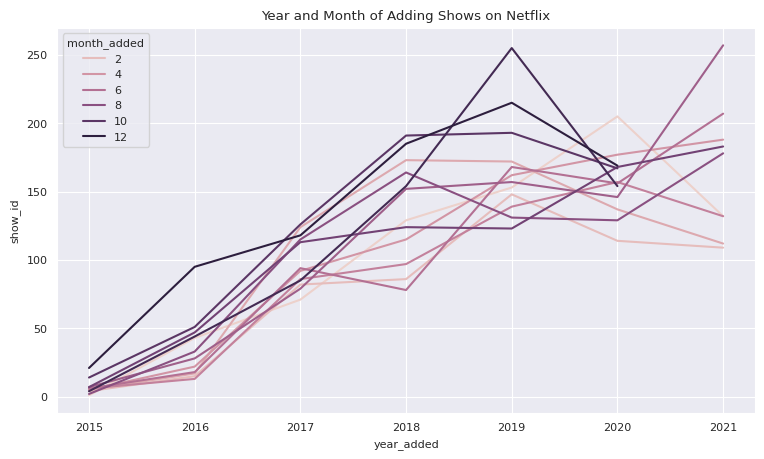

In [ ]:
sns.lineplot(data=date_added, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix');

* The number of shows getting added is increasing with each year until 2020
* Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

### Country

In [ ]:
df.country.value_counts()

United States                             2809
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

We see that many movies are released in more than 1 country. Hence, the country column has comma separated values of countries.

This makes it difficult to analyse how many movies were released in each country. We can use `explode` function in pandas to split the country column into different rows.

In [ ]:
# Convert the values in country column to list
country_df=df.copy()
country_df['country'] = country_df['country'].astype('str').apply(
    lambda x: x.split(', '))

# Explode the rows with multiple countries to different rows
country_df = country_df.explode('country').drop_duplicates()
country_count = country_df.groupby(['type','country'])['show_id'].nunique()
country_count = country_count.reset_index().sort_values('show_id',
                                                        ascending=False)
country_count.drop(country_count[country_count['country']=='nan'].index, inplace=True)
country_count

,type,country,show_id
119,Movie,United States,2748
47,Movie,India,962
247,TV Show,United States,932
117,Movie,United Kingdom,532
22,Movie,Canada,319
...,...,...,...
188,TV Show,Latvia,0
186,TV Show,Kenya,0
185,TV Show,Kazakhstan,0
182,TV Show,Jamaica,0


In [ ]:
# Country-wise count of movies/TV Shows
fig = px.treemap(
    country_count,
    values='show_id',
    path=['type','country'])

fig.show();

<Figure size 600x600 with 0 Axes>

* USA, followed by India, UK, Canada, France have the highest number of movie listings.
* USA, followed by UK, Japan, South Korea and Canada have the highest number of TV show listings

In [ ]:
#We can use the following top 6 countries for analysis
Top_6 = ['United States', 'United Kingdom', 'India',
         'Canada', 'France', 'Japan']

## Visual Analysis: Bivariate/Multivariate

### Popular Genres by Country

In [ ]:
# Splitting the listed_in column
country_df['listed_in'] = country_df['listed_in'].astype('str').apply(
    lambda x: x.split(', '))

# Explode the rows with multiple categories to different rows
country_genre_df = country_df.explode('listed_in').drop_duplicates()

In [ ]:
#Top 20 countries by count of titles
top_20 = country_df.country.value_counts().reset_index()
top_20 = top_20.loc[:20,'index'].to_list()
top_20.remove('nan')
top_20_df = country_genre_df.loc[country_genre_df['country'].isin(top_20)]

In [ ]:
#Preparing  the data for visualisation

def custom_agg(x):
  return x.nunique()

data = pd.pivot_table(top_20_df, index = top_20_df['listed_in'],
                      columns = top_20_df['country'],
                      values = 'show_id', aggfunc=custom_agg)

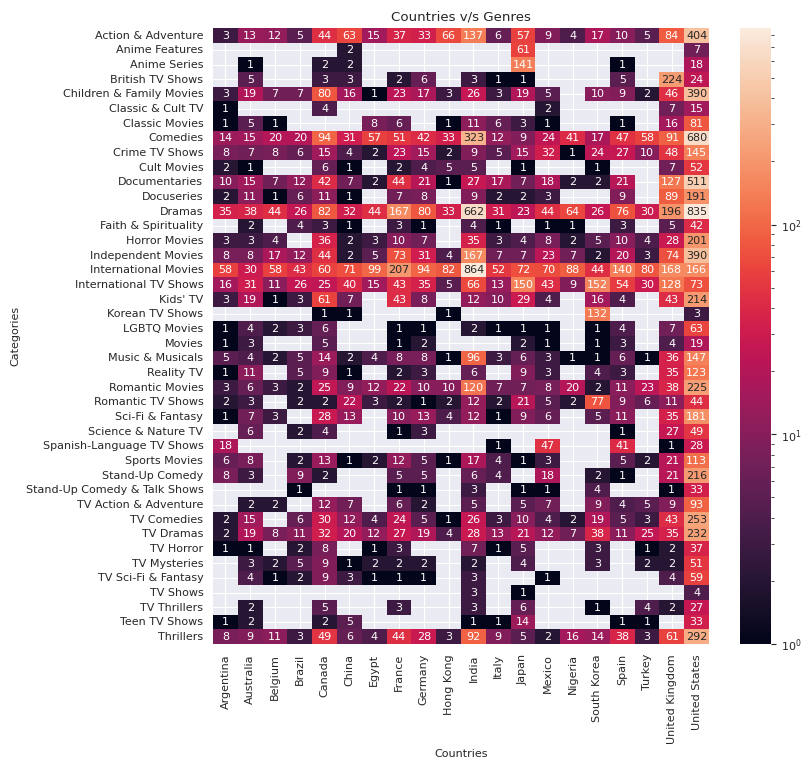

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(data, annot=True, fmt=".0f",
                 norm=matplotlib.colors.LogNorm(vmin=data.min().min(),
                                                vmax=data.max().max()))
ax.set(xlabel="Countries", ylabel="Categories", title='Countries v/s Genres');

* **Popular genres across countries:** Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers
* **Country-specific genres:** Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)
* **United States and UK** have a good mix of almost all genres





### Country-wise Rating of Content

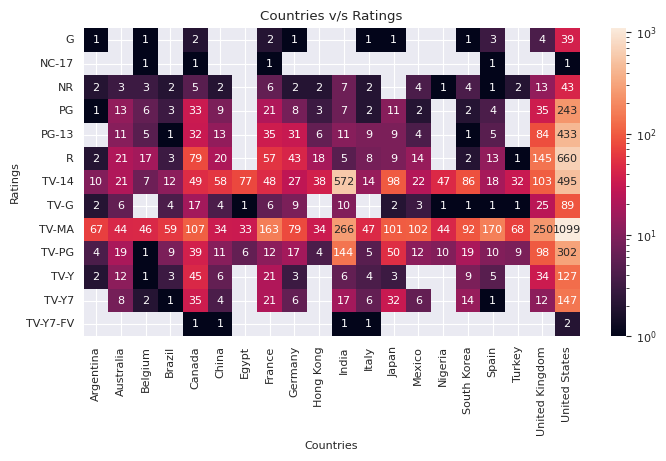

In [ ]:
#Preparing  the data for visualisation

data = pd.pivot_table(top_20_df, index = top_20_df['rating'],
                      columns = top_20_df['country'],
                      values = 'show_id', aggfunc=custom_agg)

#Heatmap using Seaborn

plt.figure(figsize=(8,4))
ax = sns.heatmap(data, annot=True, fmt=".0f",
                 norm=matplotlib.colors.LogNorm(vmin=data.min().min(),
                                                vmax=data.max().max()))
ax.set(xlabel="Countries", ylabel="Ratings", title='Countries v/s Ratings');

* Overall, Netflix has an unproportionately large amount of adult content across all countries **(TV-MA & TV-14)**
* **India** also has many titles rated **TV-PG**, other than TV-MA & TV-14
* Only **US, Canada, UK, France and Japan** have content for young audiences **(TV-Y & TV-Y7)**
* There is scarce content for **general audience (TV-G & G)** across all countries except **US**

### Popular Actors by Country

In [ ]:
# Splitting the cast column
actor_df = country_genre_df.copy()
actor_df['cast'] = actor_df['cast'].astype('str').apply(lambda x: x.split(', '))

# Explode the rows with multiple actors to different rows
actor_df = actor_df.explode('cast').drop_duplicates()

In [ ]:
# Drop rows with missing cast values
actor_df=actor_df.drop(actor_df[actor_df['cast']=='nan'].index)

In [ ]:
#Preparing Data for visualisation

country_names = ['India', 'United Kingdom', 'United States',
                 'Canada', 'France', 'Japan']

v_names = ['india_actors', 'uk_actors', 'us_actors',
        'canada_actors', 'france_actors', 'japan_actors']

data=[]

def country_wise_actors(country_name, var_name):
  var_name = actor_df.loc[(actor_df['type']=='Movie') &
                              (actor_df['country']==country_name)].groupby(
                                  'cast')['show_id'].nunique().sort_values(
                                      ascending=False).reset_index().head(10)
  data.append(var_name)
  return data

for country_name, var_name in zip(country_names, v_names):
  country_wise_actors(country_name, var_name)

data

[               cast  show_id
 0       Anupam Kher       40
 1    Shah Rukh Khan       34
 2  Naseeruddin Shah       31
 3      Akshay Kumar       29
 4           Om Puri       29
 5      Paresh Rawal       28
 6  Amitabh Bachchan       28
 7       Boman Irani       27
 8    Kareena Kapoor       25
 9        Ajay Devgn       21,
                    cast  show_id
 0           John Cleese       11
 1         Michael Palin        9
 2            Judi Dench        9
 3       Brendan Gleeson        8
 4  Helena Bonham Carter        8
 5             Eric Idle        7
 6         Terry Gilliam        7
 7          Eddie Marsan        7
 8           Johnny Depp        7
 9           James Cosmo        7,
                 cast  show_id
 0  Samuel L. Jackson       21
 1       Adam Sandler       20
 2       James Franco       19
 3       Nicolas Cage       18
 4         Seth Rogen       15
 5     Morgan Freeman       15
 6       Bruce Willis       15
 7      Molly Shannon       15
 8    Fred Tata

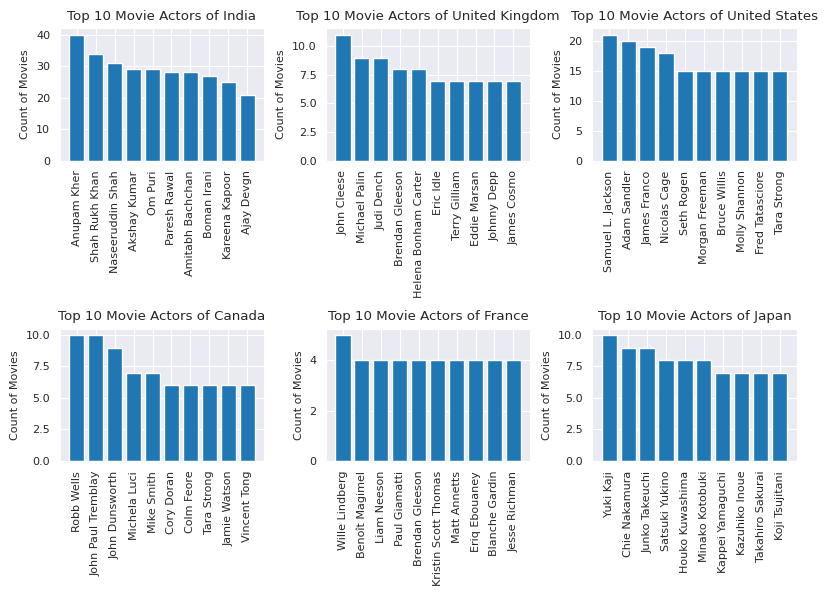

In [ ]:
#Top 10 Movie Actors by Country

fig, axes = plt.subplots(2, 3, figsize=(8,6))

for i, ax in enumerate(axes.flatten()):
  ax.bar(data[i]['cast'], data[i]['show_id'])
  ax.set_xticks(np.arange(0,10), labels=data[i]['cast'], rotation='vertical')
  ax.set_title(f'Top 10 Movie Actors of {country_names[i]}')
  ax.set_ylabel('Count of Movies')

plt.tight_layout()
plt.show();

### Popular Directors by genre

In [ ]:
# Splitting the director column
director_df = country_genre_df.copy()
director_df['director'] = director_df['director'].astype('str').apply(
                          lambda x: x.split(', '))

# Explode the rows with multiple directors to different rows
director_df = director_df.explode('director').drop_duplicates()

# Drop rows with missing cast values
director_df = director_df.drop(director_df[director_df['director']=='nan'].index)

In [ ]:
#Preparing Data for visualisation

genre_names = ['Action & Adventure', 'Children & Family Movies', 'Comedies',
               'Dramas', 'International Movies', 'International TV Shows',
               'Sci-Fi & Fantasy', 'Thrillers']

v_names = ['action', 'family', 'comedies', 'dramas',
        'int_movies', 'int_tv', 'scifi', 'thrillers']

data=[]

def genre_wise_directors(genre_name, var_name):
  var_name = director_df.loc[(director_df['listed_in']==genre_name)].groupby(
                        'director')['show_id'].nunique().sort_values(
                            ascending=False).reset_index().head(5)
  data.append(var_name)
  return data

for genre_name, var_name in zip(genre_names, v_names):
  genre_wise_directors(genre_name, var_name)

data

[            director  show_id
 0   Don Michael Paul        9
 1     S.S. Rajamouli        7
 2  Toshiya Shinohara        7
 3     Hidenori Inoue        7
 4   Steven Spielberg        5,
            director  show_id
 0     Rajiv Chilaka       22
 1       Suhas Kadav       16
 2     Prakash Satam        7
 3  Robert Rodriguez        7
 4        Steve Ball        6,
               director  show_id
 0         David Dhawan        9
 1          Hakan Algül        8
 2          Suhas Kadav        8
 3        Prakash Satam        7
 4  Cathy Garcia-Molina        7,
               director  show_id
 0      Youssef Chahine       12
 1      Martin Scorsese        9
 2  Cathy Garcia-Molina        9
 3     Hanung Bramantyo        8
 4       Hidenori Inoue        7,
               director  show_id
 0  Cathy Garcia-Molina       13
 1      Youssef Chahine       10
 2       Yılmaz Erdoğan        9
 3     Hanung Bramantyo        8
 4           Johnnie To        8,
               director  show_id
 0

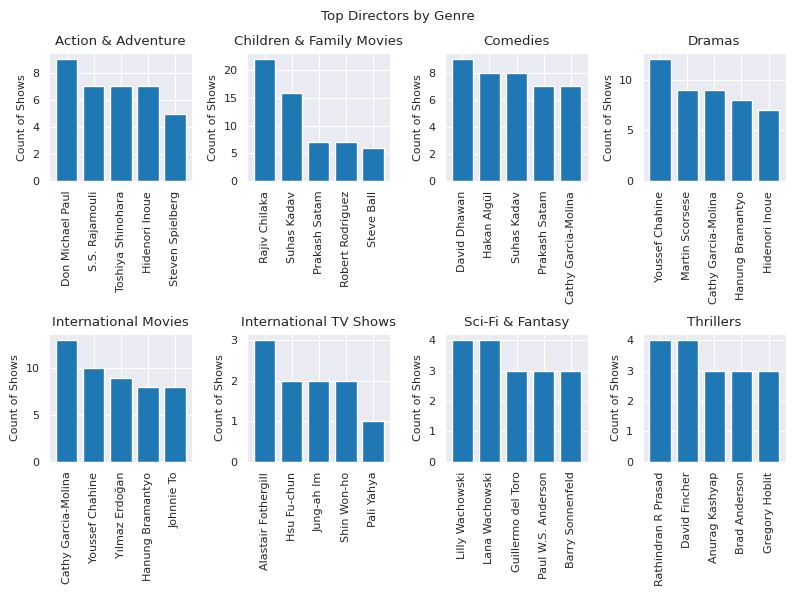

In [ ]:
#Top 5 Directors by Genre

fig, axes = plt.subplots(2, 4, figsize=(8,6))

for i, ax in enumerate(axes.flatten()):
  ax.bar(data[i]['director'], data[i]['show_id'])
  ax.set_xticks(np.arange(0,5), labels=data[i]['director'], rotation='vertical')
  ax.set_title(f'{genre_names[i]}')
  ax.set_ylabel('Count of Shows')

plt.suptitle("Top 5 Directors by Genre")
plt.tight_layout()
plt.show();

### Trend in Duration by Release Year

In [ ]:
# Remove Outliers

movie_data = movie_df[(movie_df['movie_mins']<200) &
                      (movie_df['release_year']>1980)]

tv_data = tv_df[(tv_df['tv_seasons']<=10) &
                (tv_df['release_year']>1990)]

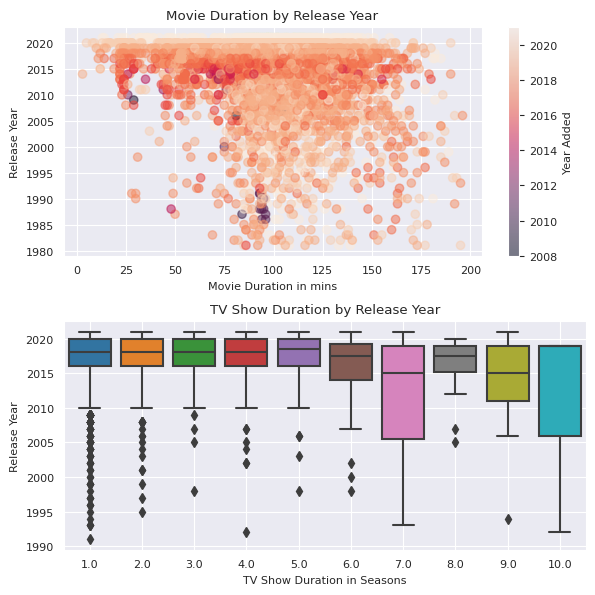

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))

scatter1 = ax[0].scatter(movie_data['movie_mins'], movie_data['release_year'],
                         c = movie_data['year_added'], alpha=0.5)
ax[0].set_xlabel('Movie Duration in mins')
ax[0].set_ylabel('Release Year')
ax[0].set_title('Movie Duration by Release Year')
ax[0].grid(True)

sns.boxplot(data = tv_data, x='tv_seasons', y='release_year', ax = ax[1])
ax[1].set_xlabel('TV Show Duration in Seasons')
ax[1].set_ylabel('Release Year')
ax[1].set_title('TV Show Duration by Release Year')
ax[1].grid(True)


fig.tight_layout()

# Add color legend
cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Year Added')

plt.show();

* There is a surge in the number of short duration movies (less than 75 mins) post 2010
* All 1-5 season TV shows are concentrated in 2010-2020 release year window. Older TV Shows have more number of seasons.

## Business Insights

**Range of Attributes:**
* *Type of Show*: Approx **70% shows are movies** and remaining 30% are TV shows
* The **release year** for shows is concentrated in the range **2000-2021**
* The **year of adding shows** is concentrated in the range **2015-2021**
* *Movie Duration:* 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot)
* *TV Show Duration:* 1-3 seasons is the range for TV shows excluding potential outliers
* *Countries:* Out of **128 countries** present in the dataset, only 23 countries have more than 50 movie titles and only 11 countries have more than 50 TV Shows
* *Ratings*: There are **12 different kinds of ratings** based on the relevance of the content for different age-groups
* The dataset consists of 36,392 actors and 4,991 directors

**Visual Analysis:**

Release Year & Year/Month of Addition to Netflix:
* **2018** marks the highest number of movie and TV show releases
* The yearly number of releases has surged drastically from 2015, so has the number of movies being added.
* Months in the **last quarter of the year (Oct-Dec)** have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

Type of content across Countries:
* USA, followed by India, UK, Canada, France have the **highest number of movie listings.**
* USA, followed by UK, Japan, South Korea and Canada have the highest number of TV show listings
* Only US, Canada, UK, France and Japan have content for **young audiences** (TV-Y & TV-Y7)
* **Country-specific genres:** Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)
* **United States and UK** have a good mix of almost all genres

Content Rating:
* Highest number of movies and TV shows are rated **TV-MA (for mature audiences)**, followed by TV-14 (14 yrs & above) & R/TV-PG (Restricted/Parental Guidance). Overall, Netflix has an unproportionately large amount of adult content across all countries.
* There is scarce content for **general audience (TV-G & G)** across all countries except US

Genre:
* **Most popular genres:** Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

Duration:
* There is a surge in the number of short duration movies (less than 75 mins) post 2010
* All 1-5 season TV shows are concentrated in 2010-2020 release year window. Older TV Shows have more number of seasons.


## Recommendations

1. **Add more content for young/general audiences:** 80% of the content on netflix (7022 out of 8790 titles) is either for mature audiences or requires parental guidance. In order to expand its target audience, Netflix needs to add more shows for familyand children.
2. **Add more variety of content in countries other than US/UK**: While US and UK have a healthy mix of all categories of content, other contries do not. At least other english speaking countries like Australia and India should have an equally good mix of content. A wider population can be targetted with more titles in genres like documentaries, horror, standup comedy, crime and musicals for these countries.
3. **Country-specific genres:** Just like Korean drama and Anime are available in Korea/Japan, more country-specific niches should be created in order to build more customisation. French and German shows would increase business in Europe. India also has blockbusters in many regional languages.
4. **Promotion & Customer Acquisition in top 5 countries**: Since Netflix already has a lot of content for countries like US, UK, India, Canada, France, Germany, Jpana and South Korea; the focus in these countries should be on customer acquisition. Tie-ups with local businesses in these countries which already have many subscribers (food delivery/telecom/editorial) can help increase customer volume.
5. **Addition of more content in the next 5 countries**: Countries like China, Indonesia, Mexico and Brazil are some of the most populous countries of the world. Content needs to be the primary focus to grow business in these set of countries.
6. **Target older Population**: 75% of the content on the platform is released after 2014. Older population can be targeted by adding more content released in the 1970s-1990s
